In [1]:
# https://data-analysis-stats.jp/%E6%B7%B1%E5%B1%9E%E5%AD%A6%E7%BF%92/keras-autoencoder-%E3%81%A7%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A5%E3%80%8C%E8%A9%90%E6%AC%BA%E6%A4%9C%E7%9F%A5%E3%80%8D/
# https://qiita.com/tk-tatsuro/items/10e9dbb3f2cf030e2119
!pip install lightGBM==4.3.0
!pip list | grep lightgbm

lightgbm                     4.3.0


In [2]:
import pandas as pd
import numpy as np
# CSVファイルを読み込む
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
print("train_data;",len(train))
print("test_data;",len(test))

train_data; 1000
test_data; 1000


In [3]:
# データの可視化
train.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,999.734000,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000
std,578.002214,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692
min,0.000000,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000
25%,496.750000,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000
50%,1007.500000,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000
75%,1512.250000,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000
max,1998.000000,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000


In [4]:
test.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,999.26600,58.221000,0.38200,576.722000,0.288000,37.195000,0.245000,277448.502756,1.029092,136.851000,0.756000,0.266000,144.869000
std,577.27564,10.157132,0.48612,908.726074,0.453058,11.479318,0.430302,85625.028062,0.688246,3.651045,0.429708,0.442085,78.195271
min,1.00000,40.000000,0.00000,23.000000,0.000000,17.000000,0.000000,117373.947400,0.627076,116.000000,0.000000,0.000000,7.000000
25%,504.50000,50.000000,0.00000,84.000000,0.000000,25.000000,0.000000,255598.445400,0.793282,136.000000,1.000000,0.000000,79.750000
50%,995.50000,58.000000,0.00000,231.000000,0.000000,35.000000,0.000000,267212.471150,0.839786,136.000000,1.000000,0.000000,172.000000
75%,1487.75000,66.000000,1.00000,582.000000,1.000000,45.000000,0.000000,279969.260275,0.948659,140.000000,1.000000,1.000000,213.000000
max,1999.00000,84.000000,1.00000,7861.000000,1.000000,60.000000,1.000000,859856.405100,9.189842,148.000000,1.000000,1.000000,285.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   int64  
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   int64  
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   int64  
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
 13  target                    1000 non-null   int64  
dtypes: float6

In [6]:
### train dataの前処理を実施

Abnormal rate is target
1    0.198
Name: count, dtype: float64


Text(0.05, 0.92, 'fraud rate  = 0.198')

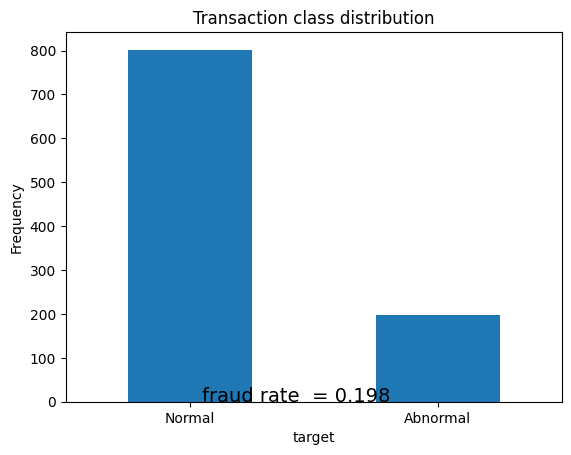

In [7]:
# 正常データと異常データの頻度を確認
import matplotlib.pyplot as plt
LABELS = ["Normal", "Abnormal"]

frauds = train[train.target == 1]
frauds_num = frauds['target'].value_counts()
normal = train[train.target == 0]
normal_num = normal['target'].value_counts()
rate = frauds_num / (frauds_num[1] + normal_num[0])
print("Abnormal rate is {}".format(rate))
count_classes = pd.value_counts(train['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("target")
plt.ylabel("Frequency")
plt.text(0.05, 0.92, 'fraud rate  = {}'.format(rate[1]), fontsize = 14)

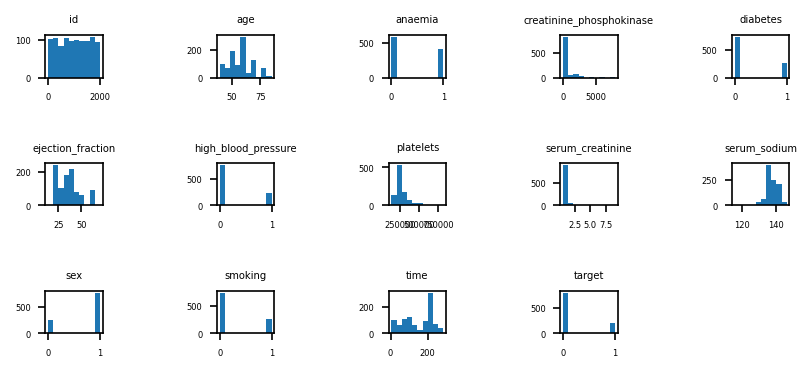

In [8]:
fig = plt.figure(dpi=150)
for i, col in enumerate(train.columns):
    plt.rcParams["font.size"] = 4
    plt.subplots_adjust(wspace=2, hspace=2)
    # plt.figure(figsize=(4, 4))
    plt.subplot2grid((5, 5), (i//5 ,i%5))
    plt.hist(train[col])
    plt.title(col)


In [9]:
# スコア低下したので除外
# # 最小値を0ではなく一番小さい値にする
# tx_amount_min = train_total[train_total.TX_AMOUNT > 0].TX_AMOUNT.min()
# per_terminal_min = train_total[train_total.per_terminal > 0].per_terminal.min()
# per_customer_min = train_total[train_total.per_customer > 0].per_customer.min()
# print(tx_amount_min)
# train_total["TX_AMOUNT"] += tx_amount_min
# train_total["per_terminal"] += per_terminal_min
# train_total["per_customer"] += per_customer_min
# train_total.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,999.734000,4.039435,0.41600,5.661085,0.270000,3.557837,0.237000,12.503200,-0.061129,4.918505,0.755000,0.25600,149.560000,0.198000
std,578.002214,0.171608,0.49314,1.183200,0.444182,0.300508,0.425455,0.250212,0.350221,0.025226,0.430302,0.43664,77.381072,0.398692
min,0.000000,3.663562,0.00000,3.135494,0.000000,2.639057,0.000000,11.836263,-0.463340,4.753590,0.000000,0.00000,4.000000,0.000000
25%,496.750000,3.912023,0.00000,4.532599,0.000000,3.401197,0.000000,12.455388,-0.225373,4.905275,1.000000,0.00000,84.500000,0.000000
50%,1007.500000,4.060443,0.00000,5.541233,0.000000,3.555348,0.000000,12.495098,-0.169142,4.916318,1.000000,0.00000,185.000000,0.000000
75%,1512.250000,4.110874,1.00000,6.366470,1.000000,3.688879,0.000000,12.542343,-0.044690,4.934474,1.000000,1.00000,213.000000,0.000000
max,1998.000000,4.442651,1.00000,8.969669,1.000000,4.248495,1.000000,13.622086,2.196624,4.983607,1.000000,1.00000,285.000000,1.000000


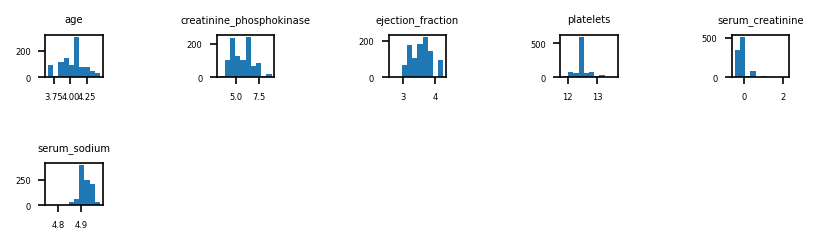

In [10]:
# 対数変換
log_list = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]
fig = plt.figure(dpi=150)
for i,indent in enumerate(log_list):
    plt.rcParams["font.size"] = 4
    plt.subplots_adjust(wspace=2, hspace=2)
    train[indent] = np.log(train[indent])
    test[indent] = np.log(test[indent])
    plt.subplot2grid((5, 5), (i//5 ,i%5))
    plt.hist(train[indent])
    plt.title(indent)
train.describe()

In [11]:
### test dataも同様に前処理を実施

In [12]:
# # 最小値を0ではなく一番小さい値にする
# tx_amount_min = test_total[test_total.TX_AMOUNT > 0].TX_AMOUNT.min()
# per_terminal_min = test_total[test_total.per_terminal > 0].per_terminal.min()
# per_customer_min = test_total[test_total.per_customer > 0].per_customer.min()
# print(tx_amount_min)
# test_total["TX_AMOUNT"] += tx_amount_min
# test_total["per_terminal"] += per_terminal_min
# test_total["per_customer"] += per_customer_min
# test_total.describe()

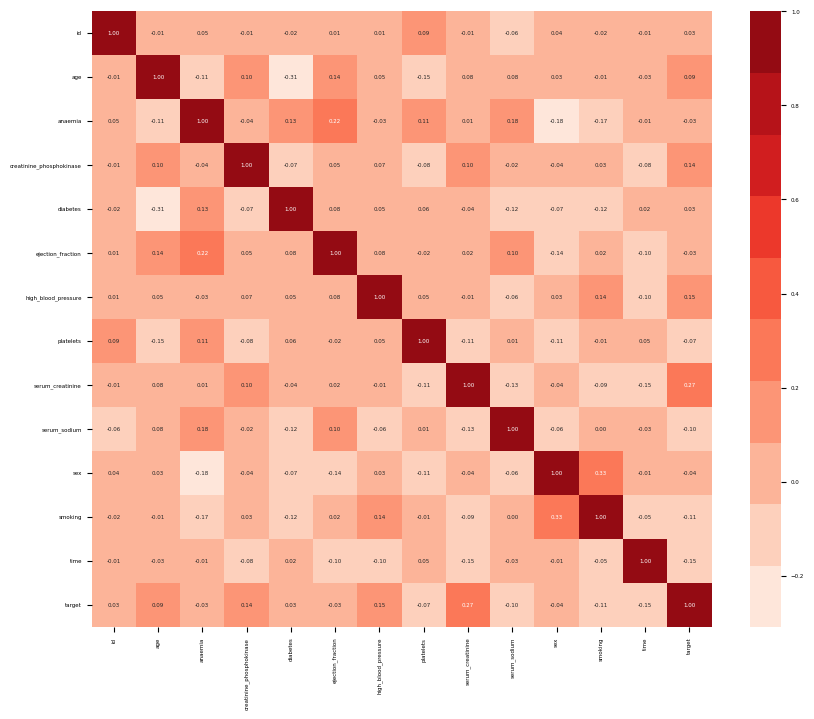

In [13]:
# 情報量が多く処理が完了しないので8月までのデータでヒートマップ算出する
import seaborn as sns
%matplotlib inline
corrs = np.corrcoef(train, rowvar=False)
fig,ax = plt.subplots(figsize=(10,8))

sns.heatmap(corrs, cmap=sns.color_palette('Reds', 10), annot=True,
            fmt='.2f', xticklabels=train.columns.tolist(), yticklabels=train.columns.tolist())
# input_features = ["x_customer_id","y_customer_id","x_terminal_id","y_terminal_id","distance",'TX_AMOUNT',"TX_AMOUNT-mean","mean_amount","std_amount","mean_nb_tx_per_day"]
# sns.heatmap(train_total[input_features],vmax=1, vmin=-1, center=0)
plt.savefig("heatmap.png")

In [14]:
##特徴選択

In [15]:
##特徴選択
!pip install imblearn

In [16]:
# # ②不均衡データへの処置
# # アンダーサンプリング
# from imblearn.under_sampling import RandomUnderSampler

# target = 'target'
# rs = RandomUnderSampler(random_state=42)
# under_sampling ,_ = rs.fit_resample(train, train[target])

# print('*'*20)
# print('＜元のデータ＞')
# print('0の件数：%d'%len(train.query(f'{target}==0')))
# print('1の件数：%d'%len(train.query(f'{target}==1')))
# print('*'*20)
# print('＜アンダーサンプリング後のデータ＞')
# print('0の件数：%d'%len(under_sampling.query(f'{target}==0')))
# print('1の件数：%d'%len(under_sampling.query(f'{target}==1')));

# train = under_sampling.copy()


In [17]:
# 学習データと結果に分割
# 正常データを異常データと同数にして学習
# train_total = under_sampling.copy()
y = train['target']
train.drop('target', axis=1, inplace=True)
# idは削除
# train.drop('id', axis=1, inplace=True)
#多重共線性の観点から位置を省いてみる
# train_total = train.drop(['x_customer_id',"y_customer_id"], axis=1) #'count' 列を削除

test_id = test["id"]
# test.drop('id', axis=1, inplace=True)
test_total = test.copy()
# test_total = test.drop(['x_customer_id',"y_customer_id"], axis=1) #'count' 列を削除


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def calc_accuracy(y_pred, y_true):
    metric = np.mean(y_true == y_pred)
    return 'accuracy', metric, True

def calc_precision(y_pred, y_true):
    metric = precision_score(y_true, y_pred)
    return 'precison', metric, True

def calc_recall(y_pred, y_true):
    metric = recall_score(y_true, y_pred)
    return 'recall', metric, True

def calc_fscore(fscores):
    metric = np.max(fscores)
    return 'fscore', metric, True

def calc_auc(y_pred, y_true):
    metric = roc_auc_score(y_true, y_pred)
    return 'auc', metric, True

def calc_prauc(y_pred, y_true):
    metric = average_precision_score(y_true, y_pred)
    return 'prauc', metric, True

In [19]:
def acquire_custom_metircs(preds ,data):
    # precisions, recalls, thresholds = precision_recall_curve(data.get_label(), preds, pos_label=1)
    # thresholds = np.append(thresholds, 1)
    # fscores = 2 * precisions * recalls / (precisions + recalls)
    # threshold_max_fscore = thresholds[np.argmax(fscores)]

    y_true = data.get_label()
    y_pred = np.where(preds > 0.5, 1, 0)

    # return [
    #     calc_accuracy(y_pred, y_true),  ＃ Accuracy
    #     calc_precision(y_pred, y_true),  ＃ Precision
    #     calc_recall(y_pred, y_true),  # Recall
    #     calc_fscore(fscores),  # F1 score
    #     calc_auc(y_pred, y_true),  # ROC AUC
    #     calc_prauc(y_pred, y_true)  # PR AUC
    # ]
    score = calc_precision(y_pred, y_true), # Precision 
    # print("precision")
    # print(score[0])
    return score[0]

In [20]:
# 上のグリッドサーチで見つけたベストパラメータで全データでの学習、推論を行い結果を算出する。
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     # 'metric': 'rmse',
#     'metric': 'binary_logloss',
#     # 'metric': 'auc', # AUCでもいい
    
#     "seed":31,
#     'random_state': 42,
#     # 'lambda_l2':5, # L2正則化をデフォルト1から5にして過学習の抑制を試みる。
#     # #'lambda_l1':100, # L1正則化をデフォルト1から5にして過学習の抑制を試みる。
#     'verbose' : -1,
#     "num_iterations":10000, # early stopping で止まるため大きめに設定しておけばよい
#     "learning_rate": 0.005, #学習率
#     "num_leaves":31,
#     "max_depth":12,
#     "min_data_in_leaf":20,
#     "bagging_fraction":0.8,
#     "bagging_freq":1,
# }
# グリッドサーチは時間かかって終わらないのでそのままにする
# if len(best_params) == 0:
# best_params = params

# 学習データと検証データの分割
from sklearn.model_selection import train_test_split
# テストデータと学習データ分割
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2, random_state=42)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   age                       1000 non-null   float64
 2   anaemia                   1000 non-null   int64  
 3   creatinine_phosphokinase  1000 non-null   float64
 4   diabetes                  1000 non-null   int64  
 5   ejection_fraction         1000 non-null   float64
 6   high_blood_pressure       1000 non-null   int64  
 7   platelets                 1000 non-null   float64
 8   serum_creatinine          1000 non-null   float64
 9   serum_sodium              1000 non-null   float64
 10  sex                       1000 non-null   int64  
 11  smoking                   1000 non-null   int64  
 12  time                      1000 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 101.7 KB


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm
#条件設定
max_score = 0
SearchMethod = 0
RFC_grid = {RandomForestClassifier(): {"n_estimators":[i for i in range(1, 100,20)],
                                       "criterion": ["gini"],
                                       "max_depth":[5,10,20],
                                       "min_samples_split":[1,3,5,10],
                                       "min_samples_leaf":[1,3,5,10],
                                      }}
# RFC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range(1, 21)],
#                                        "criterion": ["gini", "entropy"],
#                                        "max_depth":[i for i in range(1, 5)],
#                                        "random_state": [i for i in range(0, 101)]
#                                       }}
#ランダムフォレストの実行
for model, param in tqdm(RFC_grid.items()):
    clf = GridSearchCV(model, param)
    clf.fit(X_train, y_train)
    y_pred_train_rf = clf.predict(X_valid)
    score = accuracy_score(y_valid, y_pred_train_rf)

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("ベストスコア:{}".format(max_score))
print("モデル:{}".format(best_model))
print("パラメーター:{}".format(best_param))

  0%|          | 0/1 [00:00<?, ?it/s]

/home/hayato/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hayato/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hayato/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/hayato/.local/lib/python3.8/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/home/hayato/.loc

ベストスコア:0.87
モデル:RandomForestClassifier
パラメーター:{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 81}


precision_score=0.8333333333333334
recall_score=0.39473684210526316
accuracy_score=0.87


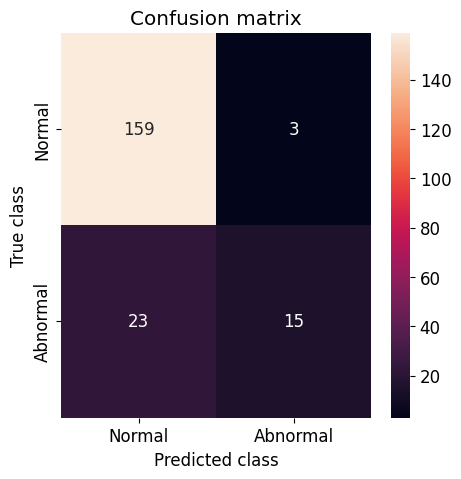

In [27]:
import os
import datetime
from sklearn import metrics

Dicision_threshould = 0.7

path = "result/" 
now = datetime.datetime.now()
filename = path + now.strftime('%Y%m%d_%H%M%S') + "_"+ "RandomForest"+ "_" + str(Dicision_threshould)+ '.png'


if not os.path.isdir(path):
   os.mkdir(path)


# スコア(RMSE)算出
y_pred_int = np.where(y_pred_train_rf > Dicision_threshould, 1, 0)
precision_score = metrics.precision_score(y_true=y_valid, y_pred=y_pred_int)
recall_score = metrics.recall_score(y_true=y_valid, y_pred=y_pred_int)
accuracy_score = metrics.accuracy_score(y_true=y_valid, y_pred=y_pred_int)

print(f'precision_score={precision_score}')
print(f'recall_score={recall_score}')
print(f'accuracy_score={accuracy_score}')
plt.rcParams["font.size"] = 12

import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
   roc_curve, recall_score, classification_report, f1_score,
   precision_recall_fscore_support)
conf_matrix = confusion_matrix(y_valid, y_pred_int)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=["Normal","Abnormal"], yticklabels=["Normal","Abnormal"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(filename)
plt.show()


In [ ]:
# lghtGBMのグリッドサーチ
## それぞれのハイパラをサーチすることでひとまずパラメータの当たり付けを行う。

In [ ]:
# ## グリッドサーチ
# import lightgbm as lgb

# # https://pythonandai.com/grid-search/
# from sklearn.model_selection import GridSearchCV
# learning_rate = [0.001]
# num_leaves = [31]
# max_depth = [12]
# min_data_in_leaf = [20]
# params = {
#     'boosting_type': ['gbdt'],
#     'objective': ['binary'],
#     # 'metric': 'rmse',
#     'metric': ['binary_logloss',"auc"],
#     # 'metric': 'auc', # AUCでもいい
    
#     # "seed":[31],
#     # 'random_state': [42],
#     # 'lambda_l2':5, # L2正則化をデフォルト1から5にして過学習の抑制を試みる。
#     # #'lambda_l1':100, # L1正則化をデフォルト1から5にして過学習の抑制を試みる。
#     # 'verbose' : [-1],
#     "num_iterations":[10000], # early stopping で止まるため大きめに設定しておけばよい
    
#     # 以下のパラメータを調整対象とする
#     "learning_rate": learning_rate, #学習率
#     "num_leaves":num_leaves,
#     "max_depth":max_depth,
#     "min_data_in_leaf":min_data_in_leaf,
#     # "bagging_fraction":[0.8],
#     # "bagging_freq":[1],
# }

# lgbm = lgb.LGBMClassifier(random_state=0)
# gcv = GridSearchCV(lgbm, params, cv=3, scoring='precision', return_train_score=True)
# gcv.fit(X_train, y_train)

In [ ]:
# # グリッドサーチの結果から、学習データとテストデータのスコアを取得
# train_score = gcv.cv_results_["mean_train_score"]
# test_score = gcv.cv_results_["mean_test_score"]

# # matplotlib.pyplotを省略名pltとしてインポート 
# import matplotlib.pyplot as plt
# plt.rcParams["font.size"] = 14

# # 学習データのスコアをプロット
# plt.plot(num_leaves, train_score, label="train_score")

# # テストデータのスコアをプロット
# plt.plot(num_leaves, test_score, label="test_score")

# # グラフにタイトルを追加
# plt.title('train_score vs test_score')

# # グラフのx軸に名前を追加
# plt.xlabel('learning_rate')

# # グラフのy軸に名前を追加
# plt.ylabel('precision')

# # 凡例の表示
# plt.legend()

# # グラフの表示
# plt.show()

In [ ]:
# # グリッドサーチの結果から、最適なパラメータを表示
# print("Best parameters: ", gcv.best_params_)

# # 最適なパラメータで学習したモデルを取得
# optimal_model = gcv.best_estimator_

# # 最適なモデルを用いて、評価用データの予測を行う
# predicted_values = optimal_model.predict_proba(test_total)[:,1]


In [ ]:
# lghtGBMのグリッドサーチ
## それぞれのハイパラをサーチすることでひとまずパラメータの当たり付けを行う。

# finish

In [28]:
# 上の方法だとうまく重みづけ学習できないので、別ページを参考に実践する
# https://an-engineer-note.com/?p=312#toc3
import lightgbm as lgb
from sklearn.utils.class_weight import compute_sample_weight
# dtrain = lgb.Dataset(X_train, label=y_train)  # 学習用
# dvalid = lgb.Dataset(X_valid, label=y_valid)  # early_stopping用
# precisionの向上には重みづけが有効
dtrain = lgb.Dataset(X_train, label=y_train, weight=compute_sample_weight(class_weight='balanced', y=y_train).astype('float32'))
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)
# https://qiita.com/Dixhom/items/fd78f461d038798a7e2e
# fobj=fobjというハイパラもある？

[0.625 0.625 0.625 0.625 0.625 0.625 0.625 2.5   2.5   2.5   0.625 0.625
 2.5   2.5   2.5   0.625 2.5   2.5   2.5   0.625 2.5   0.625 2.5   0.625
 2.5   2.5   0.625 0.625 2.5   2.5   2.5   2.5   2.5   2.5   0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 2.5   0.625 2.5   0.625 0.625 0.625
 0.625 0.625 0.625 0.625 2.5   0.625 0.625 0.625 0.625 0.625 2.5   2.5
 2.5   0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 2.5   0.625 0.625 0.625 0.625 0.625 2.5   2.5   0.625 0.625
 0.625 2.5   0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 2.5   0.625
 0.625 0.625 2.5   2.5   0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 2.5   0.625 0.625 0.625
 0.625 0.625 2.5   0.625 0.625 2.5   0.625 0.625 0.625 0.625 0.625 0.625
 0.625 2.5   2.5   0.625 2.5   0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 2.5   2.5   2.5   0.625 0.625 0.625 0.625 0.625 0.625 0.625
 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.62

In [29]:
cat_list = ['anaemia', 'diabetes', 'high_blood_pressure','sex',"smoking"]


In [30]:
learning_rate = 0.05
num_leaves = 45
max_depth = 12
min_data_in_leaf = 20
metric = "binary_logloss"
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': metric,
    # 'metric': 'binary_logloss',
    # 'metric': 'auc', # AUCでもいい
    
    # "seed":[31],
    # 'random_state': [42],
    # 'lambda_l2':5, # L2正則化をデフォルト1から5にして過学習の抑制を試みる。
    # #'lambda_l1':100, # L1正則化をデフォルト1から5にして過学習の抑制を試みる。
    # 'verbose' : [-1],
    "num_iterations":10000, # early stopping で止まるため大きめに設定しておけばよい
    
    # 以下のパラメータを調整対象とする
    "learning_rate": learning_rate, #学習率
    "num_leaves":num_leaves,
    "max_depth":max_depth,
    "min_data_in_leaf":min_data_in_leaf,
    # "bagging_fraction":0.8,
    # "bagging_freq":1,
}

In [31]:

#学習
# 以下を参考にearly stoppingを10で設定
# https://qiita.com/c60evaporator/items/2b7a2820d575e212bcf4
# ステップごとの処理結果の保存コールバックで実施するよう仕様変更更
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.record_evaluation.html

verbose_eval = 0  # この数字を1にすると学習時のスコア推移がコマンドライン表示される
evaluation_results = {} 
import time
starttime = time.time()
# best_params = gcv.best_params_
best_params = params

gbm = lgb.train(best_params,
                dtrain,
                #categorical_feature=categorical_features,
                valid_sets=[dtrain,dvalid],
                valid_names=['train', 'valid'],     
                num_boost_round = 10000,
                 categorical_feature = cat_list, #ここでcategorical_featureを設定
                # feval=acquire_custom_metircs, 
                callbacks=[lgb.early_stopping(stopping_rounds=100, 
                                verbose=True), # early_stopping用コールバック関数
                           lgb.log_evaluation(verbose_eval),
                           lgb.record_evaluation(evaluation_results)] # コマンドライン出力用コールバック関数
                )

[LightGBM] [Info] Number of positive: 160, number of negative: 640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/home/hayato/anaconda3/envs/kaggle_env/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

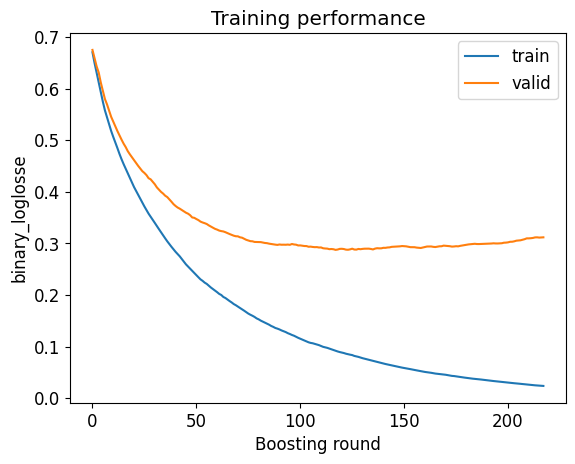

In [32]:
# 学習過程の可視化
plt.rcParams["font.size"] = 12
plt.plot(evaluation_results['train'][metric], label='train')
plt.plot(evaluation_results['valid'][metric], label='valid')
plt.ylabel('binary_loglosse')
plt.xlabel('Boosting round')
plt.title('Training performance')
plt.legend()
plt.show()

In [33]:
y_pred = gbm.predict(test_total)

In [34]:
y_pred_train = gbm.predict(X_valid)
y_pred_label_normal = y_pred_train[y_valid==0]
y_pred_label_fraud = y_pred_train[y_valid==1]


In [35]:
X_valid.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1016.350000,4.027561,0.445000,5.637083,0.300000,3.565701,0.215000,12.505666,-0.085913,4.918996,0.770000,0.230000,161.025000
std,573.223677,0.183749,0.498213,1.246294,0.459408,0.291092,0.411853,0.256261,0.304583,0.025839,0.421889,0.421889,74.562404
min,26.000000,3.688879,0.000000,3.135494,0.000000,2.639057,0.000000,11.854021,-0.434093,4.753590,0.000000,0.000000,8.000000
25%,553.500000,3.891820,0.000000,4.488444,0.000000,3.401197,0.000000,12.462995,-0.232949,4.905275,1.000000,0.000000,104.250000
50%,1066.500000,4.060443,0.000000,5.517453,0.000000,3.555348,0.000000,12.499328,-0.170867,4.919981,1.000000,0.000000,191.000000
75%,1498.500000,4.110874,1.000000,6.366470,1.000000,3.688879,0.000000,12.539307,-0.044508,4.941642,1.000000,0.000000,213.250000
max,1996.000000,4.406719,1.000000,8.679652,1.000000,4.094345,1.000000,13.613890,1.730728,4.976734,1.000000,1.000000,285.000000


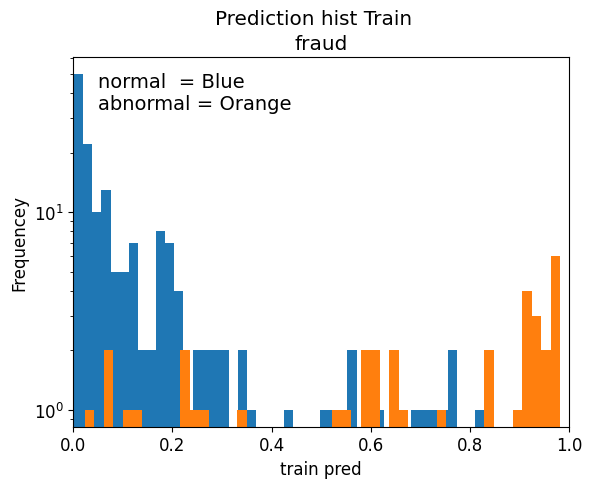

In [36]:

f, (ax) = plt.subplots()
f.suptitle('Prediction hist Train')

bins = 50

ax.hist(y_pred_label_normal, bins = bins)
ax.set_title('normal')

ax.hist(y_pred_label_fraud, bins = bins)
ax.set_title('fraud')

plt.xlabel('train pred')
plt.ylabel('Frequencey')
plt.xlim((0, 1))
plt.yscale('log')
plt.text(0.05, 0.92, 'normal  = Blue',transform = ax.transAxes, fontsize = 14)
plt.text(0.05, 0.86, 'abnormal = Orange',transform = ax.transAxes, fontsize = 14)
plt.show();

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

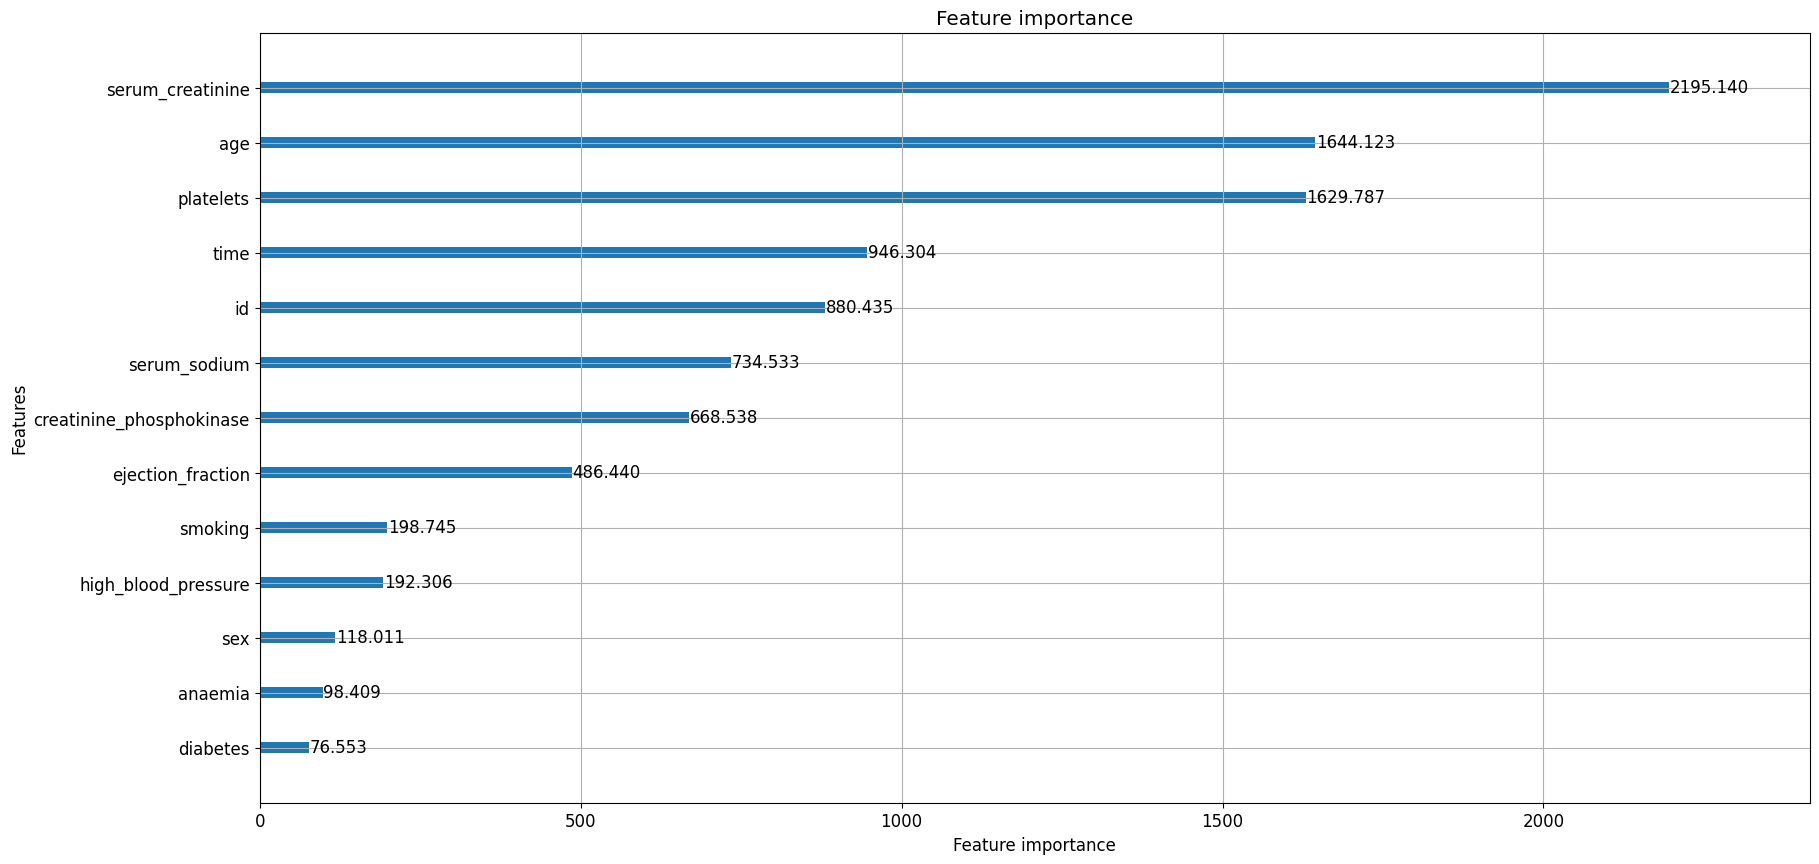

In [37]:
# 4. feature importanceが確認できる
# 特徴点（特徴量）の寄与率を明示化する。特徴点抽出
# 学習後、以下のURLを参考に寄与率を算出させてみる。
# https://qiita.com/ku_a_i/items/74241c84cda8c7327277
lgb.plot_importance(gbm, figsize=(20,10),importance_type='gain')

0.9075698505523068


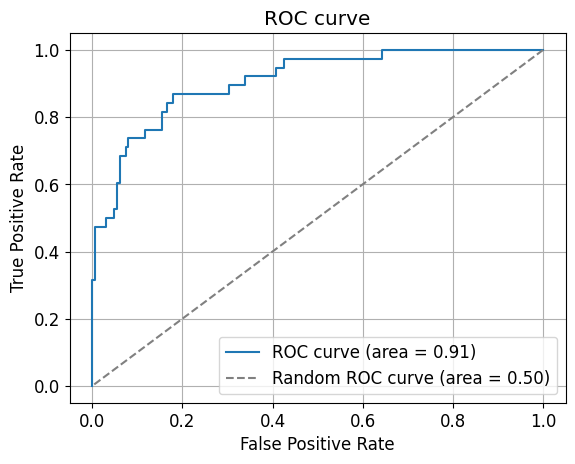

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred_train)
auc = metrics.auc(fpr, tpr)
print(auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(np.linspace(1, 0, len(fpr)), np.linspace(1, 0, len(fpr)), label='Random ROC curve (area = %.2f)'%0.5, linestyle = '--', color = 'gray')

plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


precision_score=0.7307692307692307
recall_score=0.5
accuracy_score=0.87


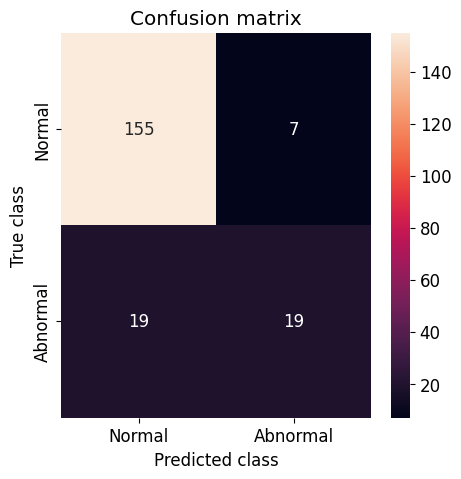

In [39]:
import os
import datetime
Dicision_threshould = 0.7

path = "result/" 
now = datetime.datetime.now()
filename = path + now.strftime('%Y%m%d_%H%M%S') + "_"+ "LightGBM"+ "_" + str(Dicision_threshould)+ '.png'


if not os.path.isdir(path):
   os.mkdir(path)


# スコア(RMSE)算出
y_pred_int = np.where(y_pred_train > Dicision_threshould, 1, 0)
precision_score = metrics.precision_score(y_true=y_valid, y_pred=y_pred_int)
recall_score = metrics.recall_score(y_true=y_valid, y_pred=y_pred_int)
accuracy_score = metrics.accuracy_score(y_true=y_valid, y_pred=y_pred_int)

print(f'precision_score={precision_score}')
print(f'recall_score={recall_score}')
print(f'accuracy_score={accuracy_score}')

import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
   roc_curve, recall_score, classification_report, f1_score,
   precision_recall_fscore_support)
conf_matrix = confusion_matrix(y_valid, y_pred_int)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=["Normal","Abnormal"], yticklabels=["Normal","Abnormal"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(filename)
plt.show()


0.7693950376411767


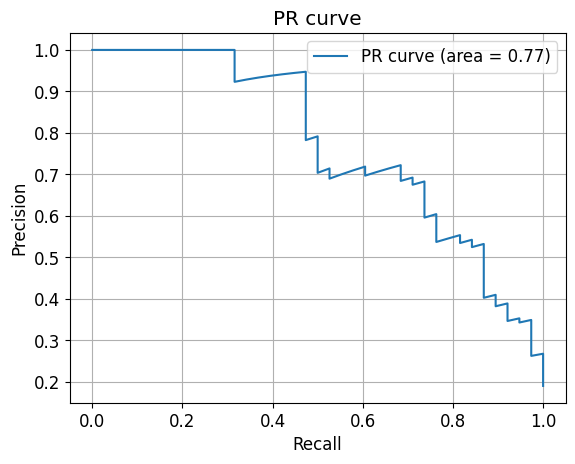

In [40]:
# y_pred = gbm.predict(test_total)
precision, recall, thresholds = metrics.precision_recall_curve(y_valid, y_pred_train)

auc = metrics.auc(recall, precision)
print(auc)

plt.plot(recall, precision, label='PR curve (area = %.2f)'%auc)
plt.legend()
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

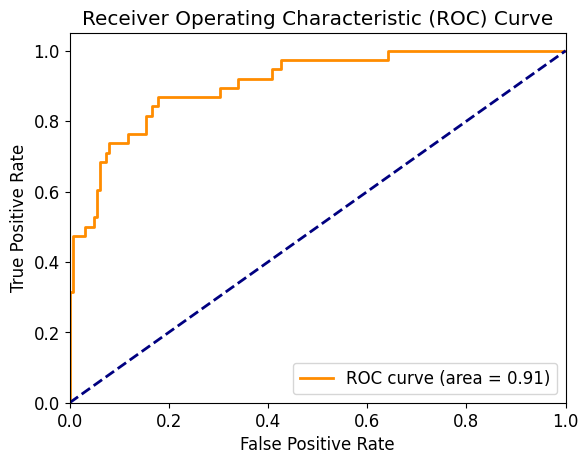

In [41]:
# ROC曲線を計算
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_train)
 
# AUCを計算
roc_auc = metrics.auc(fpr, tpr)
 
# ROC曲線をプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
y_pred = np.where(y_pred >Dicision_threshould, 1, 0)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,1
2,0
3,0
4,0


In [43]:
test_id.head()

0    1
1    2
2    4
3    5
4    6
Name: id, dtype: int64

In [44]:
# make submission file
submission_pd = pd.concat([test_id, y_pred], axis=1)
submission_pd.head()
submission_pd.to_csv("submission.csv", index = False, header = False)


precision_score=0.8571428571428571
recall_score=0.47368421052631576
accuracy_score=0.885


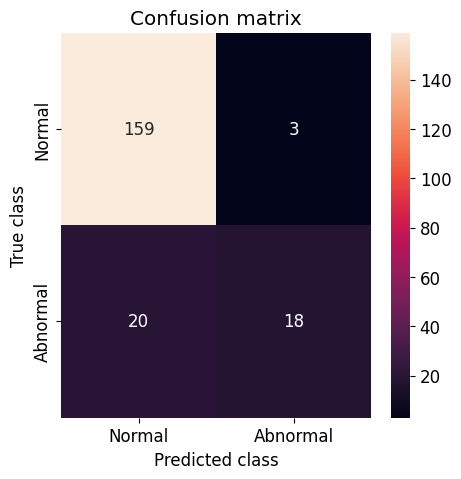

In [45]:
import os
import datetime
from sklearn import metrics

Dicision_threshould = 0.7

path = "result/" 
now = datetime.datetime.now()
filename = path + now.strftime('%Y%m%d_%H%M%S') + "_"+ "Ansamble"+ "_" + str(Dicision_threshould)+ '.png'

# y_pred_train_ansamble = (y_pred_train_rf + y_pred_train) / 2.0
y_pred_train_ansamble = y_pred_train * 0.8 + y_pred_train_rf * 0.2


# スコア(RMSE)算出
y_pred_int = np.where(y_pred_train_ansamble > Dicision_threshould, 1, 0)
precision_score = metrics.precision_score(y_true=y_valid, y_pred=y_pred_int)
recall_score = metrics.recall_score(y_true=y_valid, y_pred=y_pred_int)
accuracy_score = metrics.accuracy_score(y_true=y_valid, y_pred=y_pred_int)

print(f'precision_score={precision_score}')
print(f'recall_score={recall_score}')
print(f'accuracy_score={accuracy_score}')
plt.rcParams["font.size"] = 12

import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
   roc_curve, recall_score, classification_report, f1_score,
   precision_recall_fscore_support)
conf_matrix = confusion_matrix(y_valid, y_pred_int)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=["Normal","Abnormal"], yticklabels=["Normal","Abnormal"], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(filename)
plt.show()
